## Desafio 1

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.

Tendo como referência a imagem abaixo (no repositório, “imagens/nota-fiscal.png”), realize alguma transformação de tal forma que fique somente o boleto na imagem, sem o background, ajustando sua perspectiva.
Tal operação é similar utilizado em aplicações de escaneamento de documentos.

![alt text](imagens/nota-fiscal.png)


## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!rm -rf fiap-ml-visao-computacional/

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório

In [ ]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/desafio-1/

Importação das bibliotecas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

3.4.2


/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## 2. Solução

Text(0.5,1,'Original')

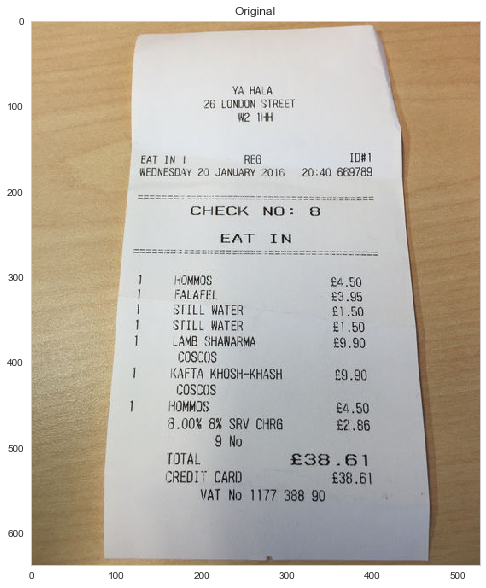

In [2]:
imagem = cv2.imread("imagens/nota-fiscal.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Original")

637 526


Text(0.5,1,'Marcadores')

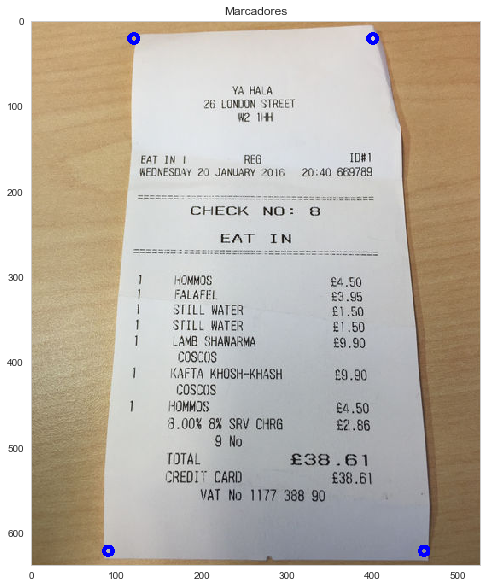

In [5]:
height, width = imagem.shape[:2]

print(height, width)

imagem_marcador = imagem.copy()

pontos_marcador = np.float32([[120,20],[400,20],[90,620],[460,620]])
pontos_expansao = np.float32([[0,0],[650,0],[0,650],[550,650]])

color = (0, 0, 255)

cv2.circle(imagem_marcador, (120,20), 5, color, 3)
cv2.circle(imagem_marcador, (400,20), 5, color, 3)
cv2.circle(imagem_marcador, (90,620), 5, color, 3)
cv2.circle(imagem_marcador, (460,620), 5, color, 3)

plt.figure(figsize=(20,10))
plt.imshow(imagem_marcador)
plt.title("Marcadores")

Text(0.5,1,'Expandida')

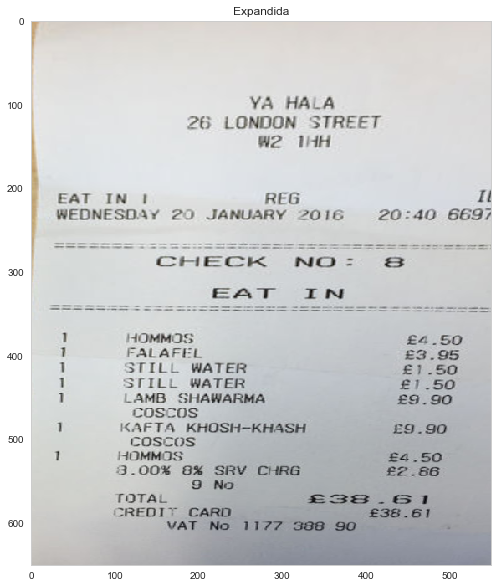

In [7]:
matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcador, pontos_expansao)
imagem_expandida = cv2.warpPerspective(imagem,matriz_perspectiva,(550,650))

plt.figure(figsize=(20,10))
plt.imshow(imagem_expandida)
plt.title("Expandida")